Ques - 1
Loading the Dataset

In [1]:
import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
file = r"/content/drive/MyDrive/cifar-10-batches-py/data_batch_1"
x = unpickle(file)
xdata = x[b'data']
ydata = x[b'labels']

file = r"/content/drive/MyDrive/cifar-10-batches-py/data_batch_2"
x = unpickle(file)
t1data = x[b'data']
t2data = x[b'labels']
xdata = np.concatenate((xdata, t1data), axis=0)
ydata = np.concatenate((ydata, t2data), axis=0)

file = r"/content/drive/MyDrive/cifar-10-batches-py/data_batch_3"
x = unpickle(file)
t1data = x[b'data']
t2data = x[b'labels']
xdata = np.concatenate((xdata, t1data), axis=0)
ydata = np.concatenate((ydata, t2data), axis=0)

file = r"/content/drive/MyDrive/cifar-10-batches-py/data_batch_4"
x = unpickle(file)
t1data = x[b'data']
t2data = x[b'labels']
xdata = np.concatenate((xdata, t1data), axis=0)
ydata = np.concatenate((ydata, t2data), axis=0)

file = r"/content/drive/MyDrive/cifar-10-batches-py/data_batch_5"
x = unpickle(file)
t1data = x[b'data']
t2data = x[b'labels']
xdata = np.concatenate((xdata, t1data), axis=0)
ydata = np.concatenate((ydata, t2data), axis=0)


In [2]:
import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
file = r"/content/drive/MyDrive/cifar-10-batches-py/test_batch"
x = unpickle(file)
x_test = x[b'data']
y_test = x[b'labels']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ques 2 
Implementing the Image Transformation function

In [3]:
import random
from matplotlib import pyplot as plt
%matplotlib inline 

In [4]:
# cutout function
def cutout(lis):
    lis = np.reshape(lis,(3,32,32))
    lis1 = lis.copy()
    n=random.randint(0,16)
    c = random.randint(0,16)
    v = random.randint(0,255)
    for i in range(3):
        for j in range(n,n+c):
            for k in range(n,n+c):
                lis1[i,j,k] = v
    return lis1
        

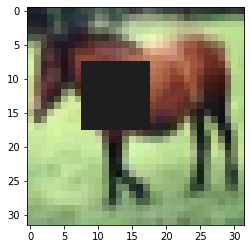

In [5]:
import random
lis = cutout(xdata[7])

plt.imshow(lis.transpose(1,2,0), interpolation='nearest')
plt.show()

In [6]:
# image cropping
def crop(image):
    
    image = np.reshape(image,(3,32,32))
    a = np.zeros(shape=(3,36,36))
    for i in range(3):
        lis =  []
        lis.append([0 for i in range(36)])
        lis.append([0 for i in range(36)])
        for j in range(32):
            lis1 = []
            lis1.append(0)
            lis1.append(0)
            for k in range(32):
                lis1.append(image[i,j,k])
            lis1.append(0)
            lis1.append(0)
            lis.append(lis1)
        lis.append([0 for i in range(36)])
        lis.append([0 for i in range(36)])
        lis = np.array(lis)
        a[i,:,:] = lis
    a = a.astype('int32')
    #a=a.transpose(1,0,2)
    lis = np.zeros((3,32,32))
    n = random.randint(0,4)
    for i in range(n,n+32):
        for j in range(n,n+32):
            lis[:,i-n,j-n] = a[:,i,j]
    lis = lis.astype('int32')
    return lis

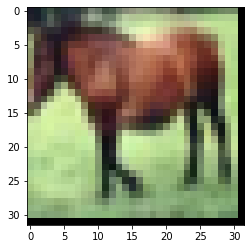

In [7]:
lis = crop(xdata[7])
plt.imshow(lis.transpose(1,2,0), interpolation='nearest')
plt.show()

In [8]:
# contrast change and horizontal fliping by 50% probability
def candh(image):
    image = np.reshape(image,(3,32,32))
    a =random.uniform(.5,2)
    for i in range(3):
        for j in range(32):
            for k in range(32):
                image[i,j,k] = a*image[i,j,k] - a*128 +128
                if(image[i,j,k] < 0):
                    image[i,j,k] = 0
                if(image[i,j,k] > 255):
                    image[i,j,k] = 255
    l = np.random.choice(np.arange(0,2), p=[0.5,0.5])
    if(l == 0):
        for i in range(3):
            for j in range(15):
                temp = np.zeros(shape=32)
                temp = image[i,j,:]
                image[i,j,:] = image[i,31-j,:] 
                image[i,31-j,:]  = temp
    #image = image.transpose(1,2,0)
    image = image.astype('int32')
    return image
    

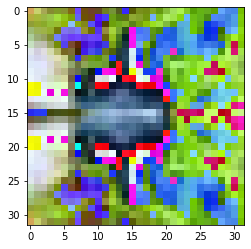

In [9]:
lis = candh(xdata[6])
lis = lis.astype('int32')
plt.imshow(lis.transpose(1,2,0), interpolation='nearest')
plt.show()

In [10]:
# rotation of image
import math
def rotate(image):
    the=random.randint(-180,180)
    the = math.radians(the)
    #print(the)
    
    image = np.reshape(image,(3,32,32))
    h = image.shape[1]
    w = image.shape[2]
    # after rotating the image by a angle , the new height and width
    n_h = round(abs(h*math.cos(the) ) + abs(w*math.sin(the) ))+1
    n_w = round(abs(w*math.cos(the) ) + abs(h*math.sin(the) )) + 1
    
    h_c = round(h/2)
    w_c = round(w/2)
    
    n_h_c = round(n_h/2)
    n_w_c = round(n_w/2)
    #print(type(n_h),n_w)
    final_image = np.zeros((3,32,32))
    new_image = np.zeros((3,n_h,n_w))
    #print(n_h)
    #print(n_w)
    for i in range(h):
        for j in range(w):
            o_h = h_c -1- i
            o_w = w_c - 1-j
            
            n_o_h = round(o_h*(1 + math.sin(the)*(-math.tan(the/2))) + o_w*(math.sin(the) *math.tan(the/2)*math.tan(the/2) - 2* math.tan(the/2)))
            
            n_o_w = round(o_h*math.sin(the) + o_w*(1 - math.sin(the)*math.tan(the/2) ))
            
            n_o_h = n_h_c - n_o_h-1
            n_o_w = n_w_c - n_o_w-1
            #print(n_o_w)
            new_image[:,n_o_h,n_o_w] = image[:,i,j]
    for i in range(32):
        for j in range(32):
            final_image[:,i,j] = new_image[:,i,j]
    final_image = final_image.astype('int32')        
    return final_image
            
            
            
    

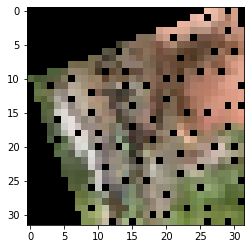

In [11]:
im = rotate(xdata[9321])
plt.imshow(im.transpose(1,2,0), interpolation='nearest')
plt.show()

Ques - 3
Creating augmented data set and saving to drive

In [ ]:
xdata_ag = np.zeros((50000,3,32,32))
ydata_ag = np.zeros((50000))
for i in range(50000):
    
    n = random.randint(0,3)
    #print(n)
    if(n == 0):
        img = rotate(xdata[i])
    elif(n==1):
        img = cutout(xdata[i])
    elif(n==2):
        img = crop(xdata[i])
    else:
        img = candh(xdata[i])
    xdata_ag[i,:,:,:] = img
    ydata_ag[i] = ydata[i]
       

In [ ]:
print(xdata_ag.shape)
# the shape of augmented matrix is 50000 , when we concatenate with unaugmented matrix , combined size will be 100000

In [ ]:
# to save balanced train set and test set back to drive 
from numpy import asarray
from numpy import save

save('/content/drive/MyDrive/cifbr/xdata.npy', xdata)
save('/content/drive/MyDrive/cifbr/ydata.npy', ydata)
save('/content/drive/MyDrive/cifbr/xdata_ag.npy', xdata_ag)
save('/content/drive/MyDrive/cifbr/ydata_ag.npy', ydata_ag)

In [ ]:
#passing xdata and xdata_ag to feature extractor

Ques 4 \\
Applying Feature extarction

Feature extraction of unaugmented data

In [ ]:
from numpy import load
xdata = load('/content/drive/MyDrive/cifbr/xdata.npy')

In [ ]:
xdata =  xdata.transpose(0,3,2,1)

In [ ]:
from feature_extractor import BBResNet18
obj = BBResNet18()
import cv2
import numpy as np
arr = np.ndarray(shape=(50000, 512), dtype=np.float32)
#xdata_res = np.zeros((1,224,224,3))
for i in range(50000):
  temp =np.zeros((1,3,224,224))
  temp[0,:,:,:] = cv2.resize(xdata[i],(224,224), interpolation = cv2.INTER_AREA).transpose(2,1,0)
  temp = temp/255
  arr[i] = obj.feature_extraction(temp.astype(np.float32))
  

  

In [ ]:
from numpy import asarray
from numpy import save

save('/content/drive/MyDrive/xunaug_data.npy', arr)

Feature extraction of augmented data

In [1]:
from numpy import load
xdata_ag = load('/content/drive/MyDrive/cifbr/xdata_ag.npy')

In [3]:
from numpy import load
xdata = load('/content/drive/MyDrive/cifbr/xdata.npy')
xdata =  xdata.transpose(0,3,2,1)

In [2]:
xdata_ag =  xdata_ag.transpose(0,3,2,1)

In [4]:
import numpy as np
xdata_ag = np.concatenate((xdata_ag, xdata), axis=0)

In [5]:
xdata_ag.shape

(100000, 32, 32, 3)

In [12]:
from feature_extractor import BBResNet18
obj = BBResNet18()
import cv2
import numpy as np
arr = np.ndarray(shape=(100000, 512), dtype=np.float32)
xdata_res = np.zeros((1,224,224,3))
for i in range(100000):
  temp =np.zeros((1,3,224,224))
  temp[0,:,:,:] = cv2.resize(xdata_ag[i],(224,224), interpolation = cv2.INTER_AREA).transpose(2,1,0)
  temp = temp/255
  arr[i] = obj.feature_extraction(temp.astype(np.float32))
  

  

In [ ]:
from numpy import asarray
from numpy import save

save('/content/drive/MyDrive/xaug_data.npy', arr)

Test data feature extraction

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
import numpy as np
x_test = np.reshape(x_test,(10000,3,32,32)).transpose(0,3,2,1)

In [ ]:
from feature_extractor import BBResNet18
obj = BBResNet18()
import cv2
import numpy as np
arr = np.ndarray(shape=(10000, 512), dtype=np.float32)
#xdata_res = np.zeros((1,224,224,3))
for i in range(10000):
  temp =np.zeros((1,3,224,224))
  temp[0,:,:,:] = cv2.resize(x_test[i],(224,224), interpolation = cv2.INTER_AREA).transpose(2,1,0)
  temp = temp/255
  arr[i] = obj.feature_extraction(temp.astype(np.float32))
  

In [ ]:
arr.shape

(10000, 512)

In [ ]:
from numpy import asarray
from numpy import save

save('/content/drive/MyDrive/test_data.npy', arr)